Neste projeto de introdução ao Keras, iremos trabalhar com um e-commerce, uma loja de roupas, e toda vez que subirmos uma imagem para a plataforma, teremos que escrever se ela é uma camiseta, bota, saia, ou seja, precisamos classificar esta imagem quando a colocamos no site.

Porém temos um problema: temos 70 mil imagens de diversos tipos de roupas, então imagine rotular cada imagem para essa quantidade de imagens. Usaremos, portanto, uma outra técnica, onde em vez de indicarmos as características delas, usaremos **funções que entenderão essas imagens e extrairão características**, então não mais nomearemos, pois **essas funções é que terão que entender o que se encontra nas imagens**.

A principal diferença aqui é que agora iremos extrair as características das próprias imagens, entendendo o que existe dentro delas com funções, portanto, não iremos mais ensinar um modelo, se tratando de um **aprendizado não supervisionado**.

Iremos utilizar um conjunto de dados de imagens de roupas do próprio Keras chamado *fashion_mnist*.
https://github.com/zalandoresearch/fashion-mnist

In [1]:
# import tensorflow
# from tensorflow.python import keras

# Importando diretamente o keras para funcionar o autocomplete
import keras
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

# Carrega os dados
# Este dataset retorna duas tuplas de arrays com as imagens
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 60 mil imagens de treino
# A tupla significa: quantidade de imagens, número de linhas e número de colunas das imagens
# 60 mil imagens, de 28 por 28 pixels
train_images.shape

(60000, 28, 28)

In [3]:
# 10 mil imagens de teste
test_images.shape

(10000, 28, 28)

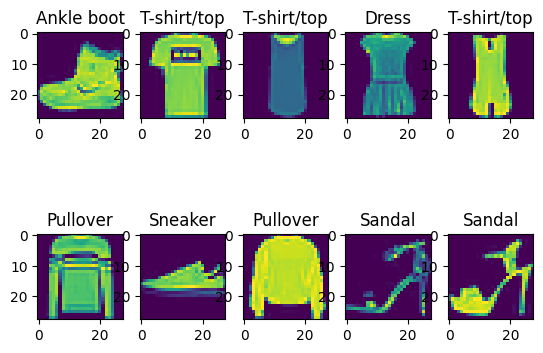

In [4]:
# Temos 10 labels
labels = ["T-shirt/top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Ankle boot"]

for index in range(0,10):
    # 2 linhas, 5 colunas
    plt.subplot(2,5, index+1)
    plt.imshow(train_images[index])
    plt.title(labels[train_labels[index]]) # Exibe o label

# Exibe a primeira imagem do dataset de treino

### Treinando o modelo

Nosso modelo téra uma **sequência** de 3 fases que envolvem:

- Entrada (Imagens)
- Processamento
- Saída (Classificação de cada roupa)

Em Keras, uma rede neural é definida empilhando camadas.

As imagens são matrizes que contem *28x28 pixels*, após o *achatamento* (**flatten**) das imagens nas camadas, cada matriz de imagem será **transformado em um vetor** com 784 de comprimento (28x28 = 784).

Abaixo criaremos uma camada em um modelo sequêncial de 3 passos, contendo 3 camadas (a primeira camada é zero), isto é, será um modelo **multi-camadas**.

**Criando a camada 0**

- Uma camada é uma estrutura na rede neural onde ocorre algum tipo de processamento nos dados.
- É possível ter diferentes funções, como transformar, aprender padrões ou reduzir informações.

**Exemplos de camadas:**
- **Dense**: Camada totalmente conectada onde cada neurônio recebe informações de todos os neurônios da camada anterior.
- **Conv2D (Convolutional Layers)**: Para processamento de imagens, usada para detectar padrões como bordas, texturas, etc.
- **MaxPooling2D**: Para reduzir o tamanho espacial das representações em redes convolucionais.
- **LSTM/GRU**: Para dados sequencias, como séries temporais ou texto.
- **BatchNormalization**: Para normalizar os dados na rede, acelerando o treinamento.
- **Dropout**: Usada para reduzir o overfitting, desativando aleatoriamente neurônios durante o treinamento.

**Criando a camada de entrada (camada 0)**

In [5]:
# Criando a sequência do modelo
model = keras.Sequential()

# No primeiro passo, precisamos definir que o formato das entradas (imagens) terão 28x28 pixels
# Em seguida, "achataremos" a imagem de 2 dimensões para apenas uma única dimensão (transformamos em um vetor)
model.add(keras.layers.Flatten(input_shape=(28,28)))

c:\Users\DIOGO-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Criando a camada 1**

Iremos criar uma camada do tipo *dense* (densa), que seria uma camada totalmente conectada, este é o tipo mais básico e comum em redes neuras, exemplo:

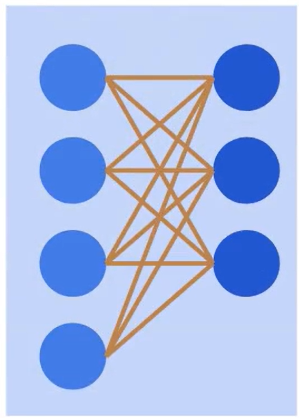

- As bolinhas são chamadas de **neurônios** ou **nós** de uma rede neural.
- Uma **rede densa** significa que **todos os neurônios são conectados**.

Para definir quantos **neurônios** terá no nosso modelo utilizamos a função *Dense*. Cada neurônio em uma camada **processa uma entrada** e **gera uma saída** que pode ser utilizada como entrada para a próxima camada.

O ideal é que a quantidade de neurônios seja um número **multiplo de 2**.

Após a definição da quantidade de neurônios, é necessário definir a **função de ativação**: 
- São operações matemáticas aplicadas à saida de cada neurônio.
- Determinam como os sinais (ou informações) passam de uma camada para outra na rede.
- Sem uma função de ativação, a rede seria linear, incapaz de aprender padrões complexos.

**ReLU (Unidade Linear Retificada)**:
- Introduz na rede neural profunda funções não lineares.
- Uma função não linear introduz no modelo a transformação dos dados necessária para identificar as diferenças nas imagens.
- Na função *ReLu*, todos os números negativos se tornam 0 e os números positivos se mantêm.

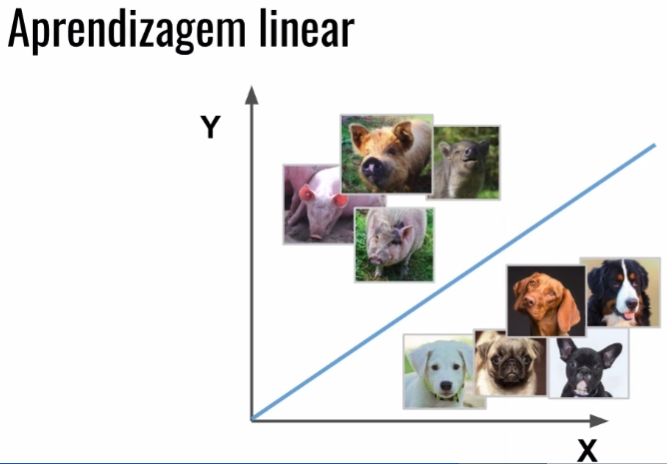

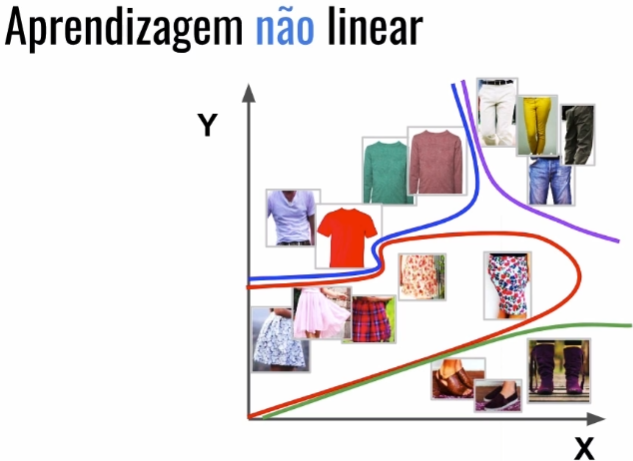

In [6]:
# Adicionando uma camada OCULTA (densa) para processamento com 256 neurônios e com a função de ativação 'relu'
model.add(keras.layers.Dense(256, activation='relu'))

# O código abaixo está comendato pois foi verificado que apenas uma camada oculta para processamento dos dados é o suficiente
# Pois mais camadas pode correr o risco de overffiting e um valor de perda maior

# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dense(64, activation='relu'))

**Camada de normalização Dropout**

Dropout é uma técnica de regularização usada para **reduzir o overfitting** em redes neurais.

**Como funciona?**
- Durante o treinamento, uma fração das unidades (neurônios) em uma camada é **aleatóriamente "desligada"**, ou seja, suas ativações são definidas como 0 em cada passo.
- É possível definir um percentual dos neurônios que serão desativados aleatoriamente em cada iteração.
- Geralmente o overfitting diminui pois, ao desligar aleatoriamente alguns neurônios, o modelo é forçado a aprender padrões gerais dos dados em vez de memorizar detalhes muito específicos.

Porém é necessário cautela, pois valores muito altos pode prejudicar o aprendizado.

In [7]:
# Aqui, para evitar o overfitting, 20% dos neurônios serão aleatoriamente desligados
model.add(keras.layers.Dropout(0.2))

**Criando a camada de saída**

Função **Softmax**:
- É uma função que realiza classificação multiclasse (mais de uma classe), no nosso caso, temos 10.
- Cada neurônio irá "chutar" a **probabilidade** em percentual do item ser de uma classe específica.
- A soma de cada probabilidade dará 100% (na verdade, resultará em 1, pois esses números são divididos por 100).

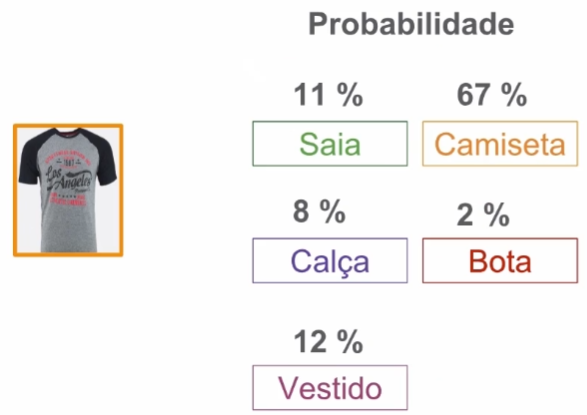

In [8]:
# Adicionando a camada de saída com 10 neurônios, pois temos 10 tipos de roupas no dataset
# Com a função de ativação 'softmax' para classificação multiclasse
model.add(keras.layers.Dense(10, activation='softmax'))

### Compilando o modelo

Diferente dos modelos tradicionais de Machine Learning, uma rede neural precisa ser compilada antes de ser treinada.

Necessário passar os parâmetros **otimizador** e **perda**.

**O que é loss (função de perda)?**

- A função de perda mede **o quão ruim está a previsão do modelo comparada aos dados reais**. O objetivo durante o treinamento é minimizar essa perda, ou seja, ajustar os pesos da rede para que a saída prevista fique mais próxima do valor esperado.
- Para classificação multiclasse, uma das opções é usar o *sparse_categorical_crossentropy* (Entropia cruzada categórica esparsa).

**O que é optimizer (otimizador)?**
- O otimizador é o algoritmo que ajusta os pesos da rede neural para minimizar a perda. ELe controla como o modelo aprende a partir dos dados.
- Ele faz isso em pequenos passos, chamados de *taxa de aprendizado* (learning rate).

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # Adicionamos também a métrica de acurácia do treino

### Normalização dos dados

Antes mesmo de treinar o modelo com os dados, é necessário realizar a normalização.

**O que é normalização de imagens?**
- Imagens geralmente são representadas como matrizes de números inteiros.
- Cada número (ou pixel) pode variar de 0 a 255, dependendo da escala de cor (escala de cinza ou RGB).
- Por exemplo, um pixel preto tem valor 0, e um pixel branco tem valor 255.

**Por que normalizar?**
- Dividir os valores por 255 transforma a escala de 0 - 255 para 0 - 1
- Redes neurais funcionam melhor quando as entradas estão em uma escala pequena e próxima de zero.
- Isso ajuda as funções de ativação a operar eficientemente.
- Existem outros tipos de normalização em outros contextos, porém para este caso de imagens iremos dividir por 255, pois conhecemos os limites dos dados (array de numeros inteiros que variam de 0 a 255).

In [10]:
train_images = train_images / 255.0

### Treinando o modelo

O ideal é que a perda (*loss*) seja um valor mais próximo de zero possível.

O treinamento abaixo apenas está considerando 1875 imagens do dataset de treino pois o parâmetro *batch_size* por padrão é 32. Este parâmetro está dividindo o nosso conjunto de dados de 60 mil imagens por 32, o resultado é 1875.

**Par que serve o Batch Size?**
- Divide o conjunto de dados em lotes menores, chamados de batches.
- Evita problemas de memória (não carregando todas as 60 mil imagens de uma só vez).
- Facilita a atualização dos pesos do modelo em pequenos passos, ao invés de esperar processar todos os dados.
- O número escolhido como *batch_size* indica o número de amostras usadas em cada passo do treinamento.

Exemplo:
- Se tivermos 60 mil imagens e definirmos o *batch_size* como 32, o modelo processará 32 imagens por vez e completará uma época (*epoch*) após 1875 batches (lotes).
- Isto significa que com o parâmetro configurado em 32, o número 1875 corresponde ao número de imagens por lote que terá em cada época.

**Treinamento com épocas (*epochs)***

Uma época é uma **passagem completa por todo o conjunto de dados de treinamento** durante o processo de aprendizado da rede neural.

Quando treinamos uma rede neural, os dados são usados para ajustar os pesos da rede. Esse processo é feito em etapas, e uma época é uma dessas etapas completas, onde **todos os dados são passados pelo modelo exatamente uma vez**.

**Por que utilizar múltiplas épocas?**

O treinamento de uma rede neural geralmente não é concluído em apenas uma passagem pelos dados (uma única época).
- Uma única época pode não ser suficiente para que o modelo **aprenda padrões significativos** nos dados.
- o modelo ajusta os pesos gradualmente usando o *algoritmo de backpropagation*, então **cada época melhora um pouco a performance**.
- Épocas adicionais permitem refinamento, mas há um ponto em que muitas épocas podem levar ao **overfitting**.

**Qual o número de épocas ideal?**
- Geralmente, o número de épocas é determinado por experimentação:
- - **Poucas épocas:** O modelo pode ficar subtreinado (underfitting, não aprende o suficiente).
- - **Muitas épocas:** O modelo pode ficar supertreinado (overfitting).
- Uma prática comum é usar o **early stopping**, que interrompe o treinamento quando o desempenho no conjunto de validação para de melhorar.

In [11]:
history = model.fit(train_images, train_labels,
          epochs=10, # Definindo a quantidade de épocas
          validation_split=0.2) # Divide o conjunto de dados em 20% para validação

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7606 - loss: 0.6747 - val_accuracy: 0.8493 - val_loss: 0.4155
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8538 - loss: 0.4030 - val_accuracy: 0.8664 - val_loss: 0.3642
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8674 - loss: 0.3612 - val_accuracy: 0.8608 - val_loss: 0.3863
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8757 - loss: 0.3354 - val_accuracy: 0.8691 - val_loss: 0.3557
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8806 - loss: 0.3213 - val_accuracy: 0.8743 - val_loss: 0.3468
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8851 - loss: 0.3068 - val_accuracy: 0.8806 - val_loss: 0.3338
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8911 - loss: 0.2960 - val_accuracy: 0.8744 - val_loss: 0.3402
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8956 - loss: 0.2814 - 

**Visualizando as métricas de de acurácia no treino e teste**

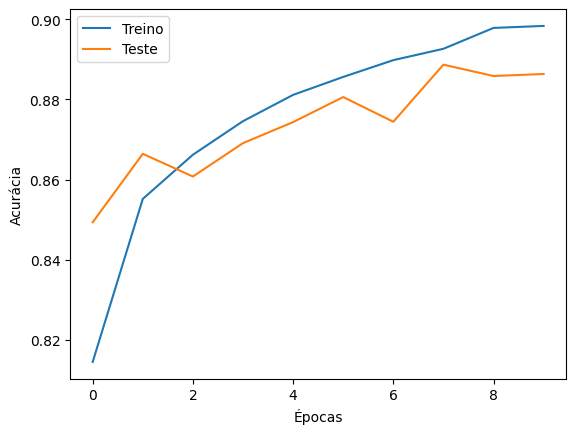

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend(['Treino', 'Teste'])

**Métricas de perda**

O ideal é que nos dados de teste, cada vez mais se aproxime de zero.

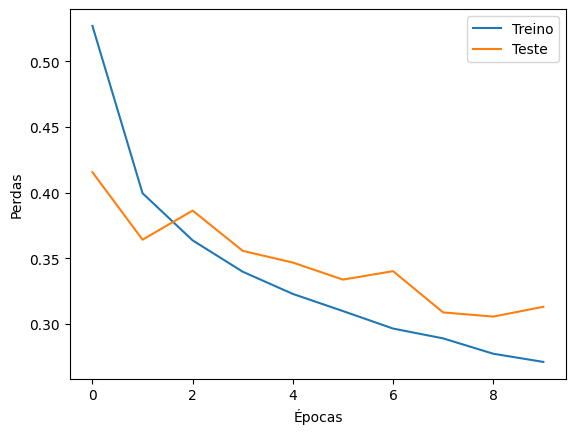

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Épocas")
plt.ylabel("Perdas")
plt.legend(['Treino', 'Teste'])

### Avaliação e validação do modelo

In [14]:
test_loss, accuracy_test = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8652 - loss: 55.9780


### Salvando o modelo

In [15]:
# A extensão .h5 se tornou legada
# Utilizar a extensão .keras
model.save('modelo_classificacao_roupas.keras')
saved_model = keras.saving.load_model('modelo_classificacao_roupas.keras')